In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

### Loading and Inspecting Data

In [2]:
#File location
file_path = 'C:/Users/lyasm/OneDrive/Desktop/Regional Sales Dataset.xlsx'

In [3]:
#Reading sheets into seperate dataframes
sales_df = pd.read_excel(file_path, sheet_name = 'Sales Orders')
cust_df = pd.read_excel(file_path, sheet_name = 'Customers')
reg_df = pd.read_excel(file_path, sheet_name = 'Regions')
streg_df = pd.read_excel(file_path, sheet_name = 'State Regions')
prod_df = pd.read_excel(file_path, sheet_name = 'Products')
bdgt_df = pd.read_excel(file_path, sheet_name = '2024 Budgets')

In [4]:
#Displaying the dataframes
print('Sales Orders Dataframe:')
sales_df.head(2)

Sales Orders Dataframe:


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918


In [5]:
print('Customers Dataframe:')
cust_df.head(2)

Customers Dataframe:


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group


In [6]:
print('Regions Dataframe:')
reg_df.head(2)

Regions Dataframe:


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago


In [7]:
print('State Regions Dataframe:')
streg_df.head(2)

State Regions Dataframe:


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South


In [8]:
print('Products Dataframe:')
prod_df.head(2)

Products Dataframe:


,Index,Product Name
0,1,Product 1
1,2,Product 2


In [9]:
print('2024 Budget Dataframe:')
bdgt_df.head(2)

2024 Budget Dataframe:


,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565


In [10]:
#Fixing the column name for the State Regions Dataframe
# Fix column names
new_column_names = ['State Code', 'State', 'Region']
streg_df.columns = new_column_names

# Drop the first row if it contains headers (optional)
streg_df = streg_df.drop(index=0).reset_index(drop=True)

# Displaying the updated DataFrame
print('State Regions Dataframe:')
streg_df.head(2)

State Regions Dataframe:


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South


In [11]:
#Checking for null value
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [12]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer Index  175 non-null    int64 
 1   Customer Names  175 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [13]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             994 non-null    int64  
 1   name           994 non-null    object 
 2   county         994 non-null    object 
 3   state_code     994 non-null    object 
 4   state          994 non-null    object 
 5   type           994 non-null    object 
 6   latitude       994 non-null    float64
 7   longitude      994 non-null    float64
 8   area_code      994 non-null    int64  
 9   population     994 non-null    int64  
 10  households     994 non-null    int64  
 11  median_income  994 non-null    int64  
 12  land_area      994 non-null    int64  
 13  water_area     994 non-null    int64  
 14  time_zone      994 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 116.6+ KB


In [14]:
streg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  48 non-null     object
 1   State       48 non-null     object
 2   Region      48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [15]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [16]:
bdgt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2024 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


### Merging Data into one Dataframe

In [17]:
#Creating one dataframe by joining all the dataframes together
#merged_df =pd.merge(df1, df2, left_on = 'column1', right_on ='column2')
merged_df1 =pd.merge(sales_df, cust_df, left_on = 'Customer Name Index', right_on ='Customer Index')

In [18]:
merged_df1.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0008833,2014-01-03,126,Wholesale,USD,NXH382,292,4,10,6371.7,63717.0,2803.548,126,Rhynoodle Ltd
2,SO - 0006962,2014-01-04,126,Distributor,USD,AXW291,559,4,9,2720.2,24481.8,1251.292,126,Rhynoodle Ltd
3,SO - 0008999,2014-01-04,126,Distributor,USD,AXW291,743,15,8,5601.2,44809.6,2632.564,126,Rhynoodle Ltd
4,SO - 0008954,2014-01-04,126,Distributor,USD,AXW291,731,19,10,3939.6,39396.0,3348.660,126,Rhynoodle Ltd


In [19]:
merged_df2 =pd.merge(merged_df1, prod_df, left_on = 'Product Description Index', right_on ='Index')

In [20]:
merged_df2.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 000225,2014-07-06,126,Wholesale,USD,AXW291,202,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
2,SO - 0009989,2014-09-06,126,Wholesale,USD,FLR025,221,27,9,958.1,8622.9,814.385,126,Rhynoodle Ltd,27,Product 27
3,SO - 0006855,2014-12-31,126,Wholesale,USD,FLR025,688,27,9,958.1,8622.9,814.385,126,Rhynoodle Ltd,27,Product 27
4,SO - 0009989,2015-05-03,126,Wholesale,USD,FLR025,461,27,9,958.1,8622.9,814.385,126,Rhynoodle Ltd,27,Product 27


In [21]:
merged_df3 =pd.merge(merged_df2, reg_df, left_on = 'Delivery Region Index', right_on ='id')

In [22]:
merged_df3.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0006606,2016-09-22,82,Wholesale,USD,GUT930,364,27,8,1715.2,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
2,SO - 0010382,2017-07-07,169,Distributor,USD,GUT930,364,27,12,214.4,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
3,SO - 0001412,2014-01-21,49,Distributor,USD,AXW291,364,4,10,261.3,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
4,SO - 0008050,2017-06-30,138,Distributor,USD,AXW291,364,15,11,2318.2,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York


In [23]:
merged_df4 =pd.merge(merged_df3, streg_df, left_on = 'state_code', right_on ='State Code')

In [24]:
merged_df4.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0006606,2016-09-22,82,Wholesale,USD,GUT930,364,27,8,1715.2,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
2,SO - 0010382,2017-07-07,169,Distributor,USD,GUT930,364,27,12,214.4,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
3,SO - 0001412,2014-01-21,49,Distributor,USD,AXW291,364,4,10,261.3,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
4,SO - 0008050,2017-06-30,138,Distributor,USD,AXW291,364,15,11,2318.2,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South


In [25]:
df =pd.merge(merged_df4, bdgt_df, left_on = 'Product Name', right_on ='Product Name')

In [26]:
#inspecting the final dataframe
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region,2024 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
1,SO - 0006606,2016-09-22,82,Wholesale,USD,GUT930,364,27,8,1715.2,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
2,SO - 0010382,2017-07-07,169,Distributor,USD,GUT930,364,27,12,214.4,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
3,SO - 0001570,2014-03-27,53,Distributor,USD,AXW291,352,27,8,3912.8,...,74843,29076,29676,142614721,1974494,America/New York,GA,Georgia,South,964940.231
4,SO - 0005741,2014-10-19,162,Wholesale,USD,FLR025,352,27,9,4013.3,...,74843,29076,29676,142614721,1974494,America/New York,GA,Georgia,South,964940.231


### Data Cleaning

In [27]:
# Checking for duplicated rows
duplicates = df.duplicated()

# Display the boolean Series indicating duplicates
print("\nBoolean Series indicating duplicates:")
print(duplicates)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Boolean Series indicating duplicates:
0        False
1        False
2        False
3        False
4        False
         ...  
64099    False
64100    False
64101    False
64102    False
64103    False
Length: 64104, dtype: bool

Number of duplicate rows: 0


In [28]:
#Printing the column names to check for redundant columns
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'State', 'Region', '2024 Budgets'],
      dtype='object')

In [29]:
#Removing redundant columns, these are columns used to join the dataframes
cols_drop = ['Customer Name Index', 'Index', 'id', 'name', 'area_code', 'time zone', 'county', 'State Code', 'Currency Code', 'Warehouse Code','land_area','water_area' ]

df = df.drop(columns = cols_drop, errors='ignore')
#checking to confirm columns were dropped
df.head()

,OrderNumber,OrderDate,Channel,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,...,type,latitude,longitude,population,households,median_income,time_zone,State,Region,2024 Budgets
0,SO - 000225,2014-01-01,Wholesale,364,27,6,2499.1,14994.6,1824.343,126,...,City,32.08354,-81.09983,145674,52798,36466,America/New York,Georgia,South,964940.231
1,SO - 0006606,2016-09-22,Wholesale,364,27,8,1715.2,13721.6,823.296,82,...,City,32.08354,-81.09983,145674,52798,36466,America/New York,Georgia,South,964940.231
2,SO - 0010382,2017-07-07,Distributor,364,27,12,214.4,2572.8,120.064,169,...,City,32.08354,-81.09983,145674,52798,36466,America/New York,Georgia,South,964940.231
3,SO - 0001570,2014-03-27,Distributor,352,27,8,3912.8,31302.4,1956.400,53,...,City,31.57851,-84.15574,74843,29076,29676,America/New York,Georgia,South,964940.231
4,SO - 0005741,2014-10-19,Wholesale,352,27,9,4013.3,36119.7,2207.315,162,...,City,31.57851,-84.15574,74843,29076,29676,America/New York,Georgia,South,964940.231


In [30]:
# Parse date and add time parts
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['year'] = df['OrderDate'].dt.year
df['quarter'] = df['OrderDate'].dt.to_period('Q').astype(str)
df['month'] = df['OrderDate'].dt.month

In [31]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

# Rename for clarity and consistency
df = df.rename(columns={
    'ordernumber'      : 'order number',    # unique order identifier
    'orderdate'        : 'order date',      # date of the order
    'channel'          : 'sales channel',   # sales channel (e.g., Online
    'line total'       : 'revenue',         # total revenue for the line item
    '2024 budgets'     : 'budget'          # budget for 2024
})

# Display the updated list of column names
df.columns.values

array(['order number', 'order date', 'sales channel',
       'delivery region index', 'product description index',
       'order quantity', 'unit price', 'revenue', 'total unit cost',
       'customer index', 'customer names', 'product name', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'population',
       'households', 'median_income', 'time_zone', 'state', 'region',
       'budget', 'year', 'quarter', 'month'], dtype=object)

In [32]:
#Checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order number               64104 non-null  object        
 1   order date                 64104 non-null  datetime64[ns]
 2   sales channel              64104 non-null  object        
 3   delivery region index      64104 non-null  int64         
 4   product description index  64104 non-null  int64         
 5   order quantity             64104 non-null  int64         
 6   unit price                 64104 non-null  float64       
 7   revenue                    64104 non-null  float64       
 8   total unit cost            64104 non-null  float64       
 9   customer index             64104 non-null  int64         
 10  customer names             64104 non-null  object        
 11  product name               64104 non-null  object        
 12  stat

### Exploratory Analysis of the Data

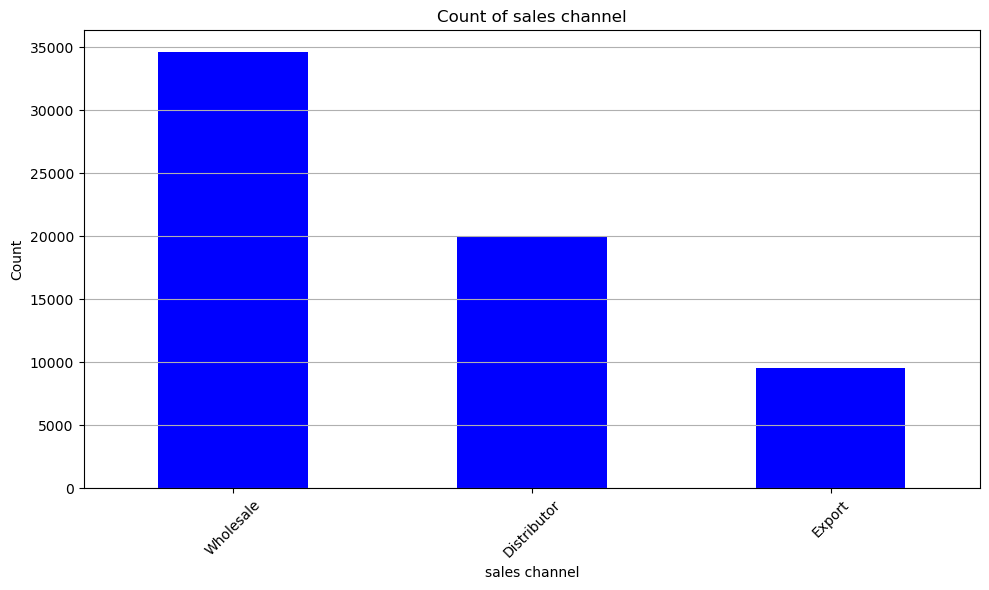

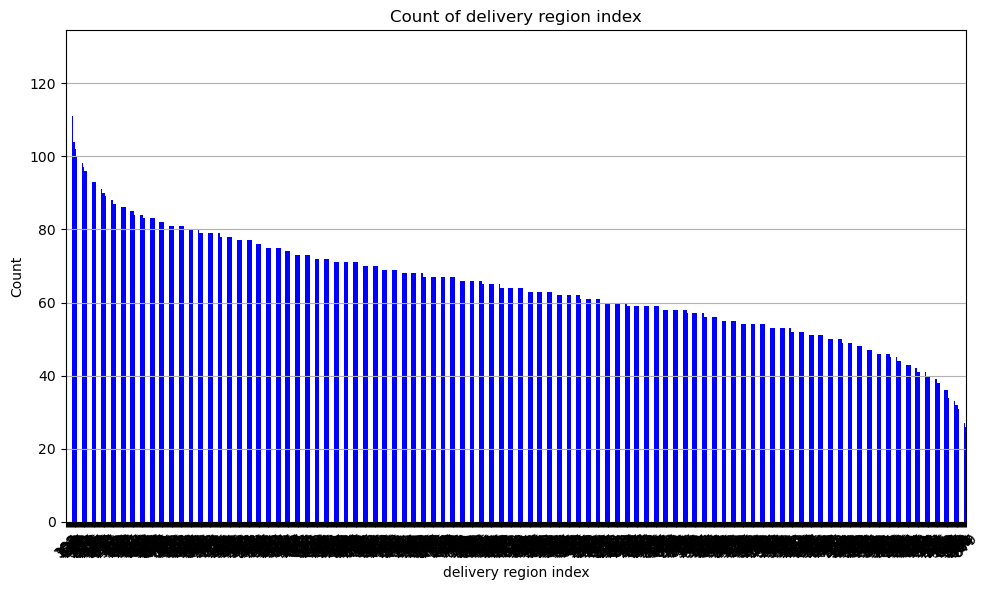

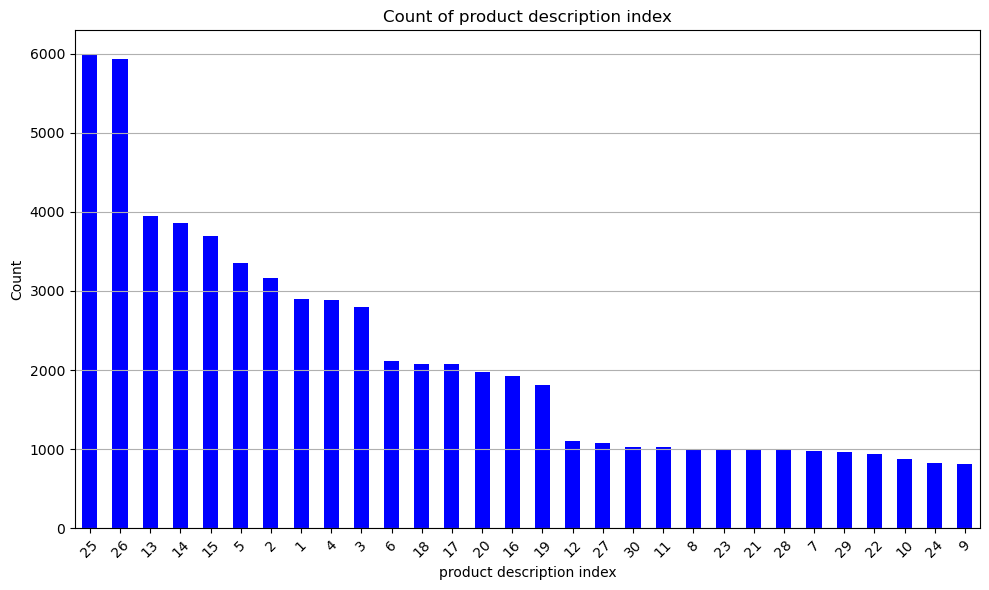

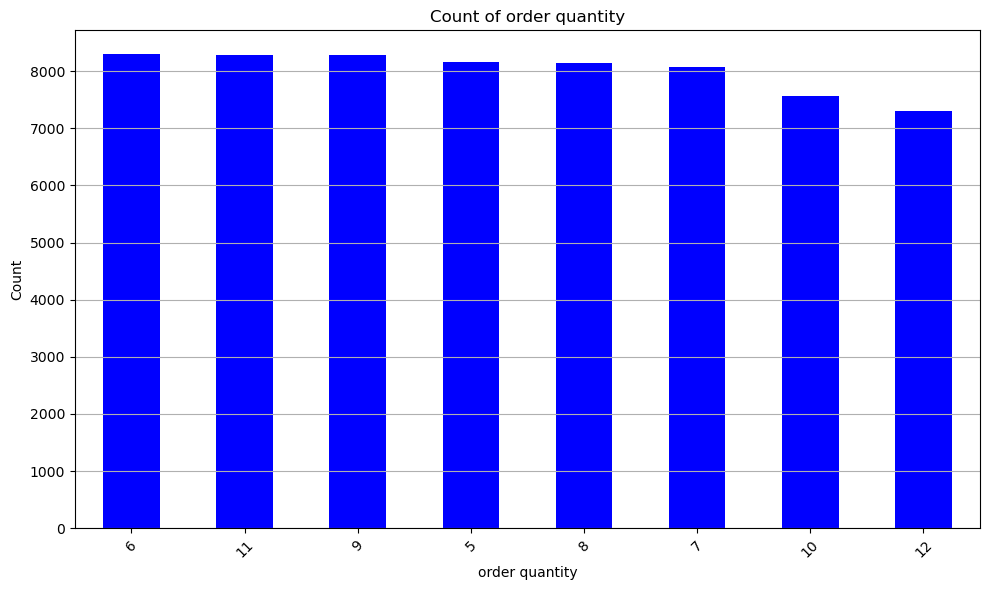

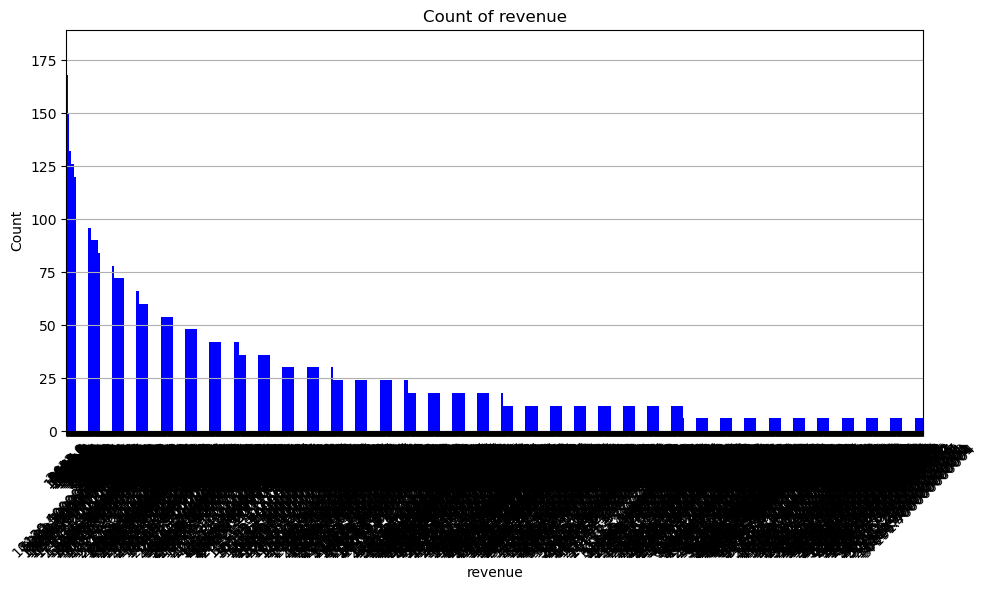

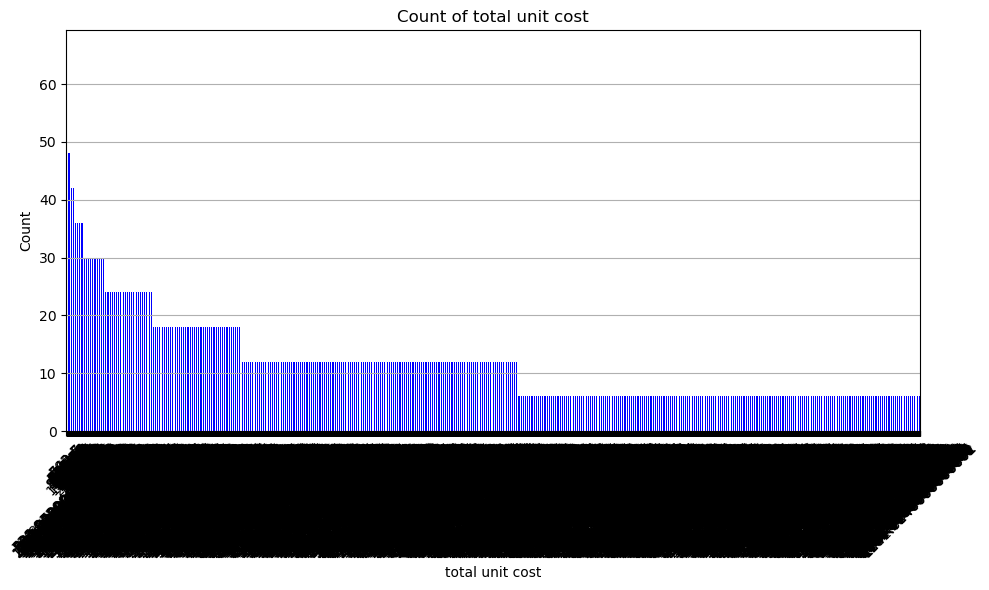

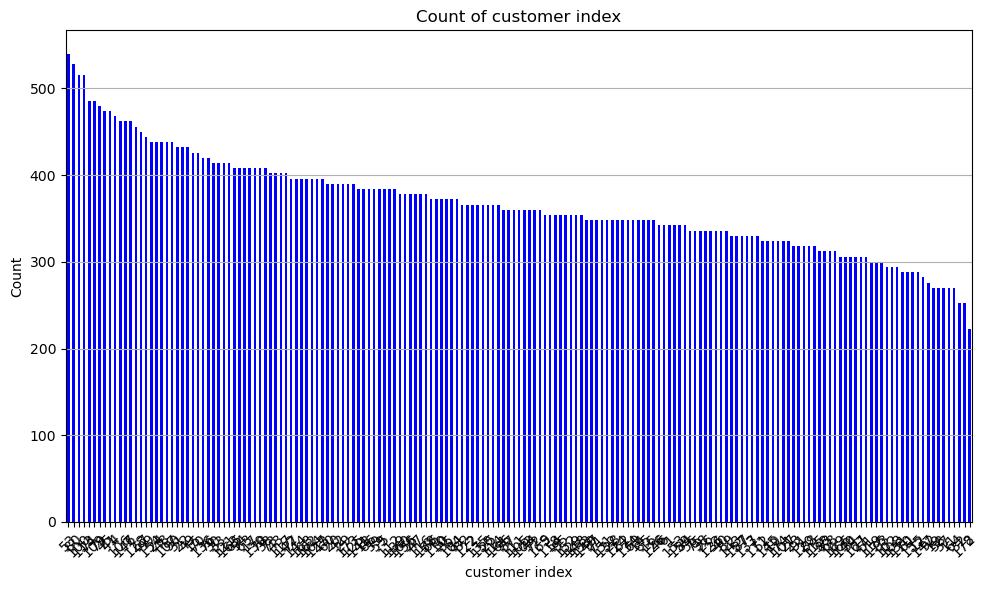

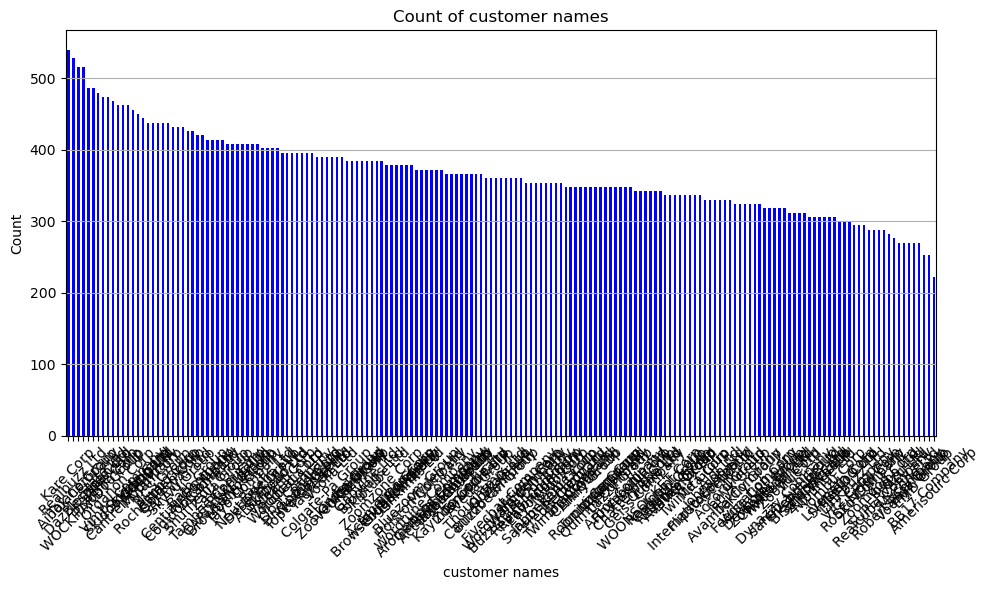

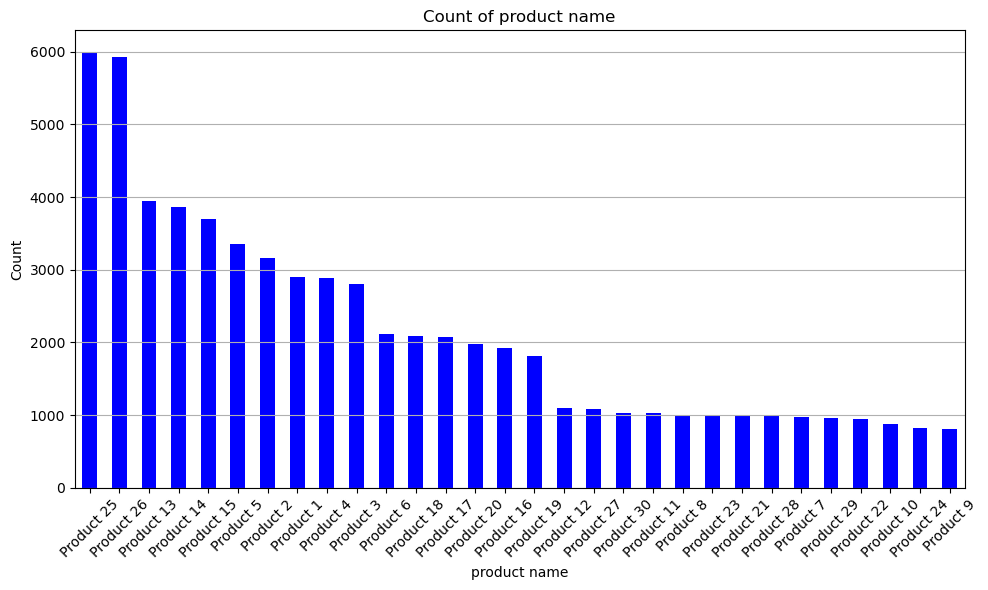

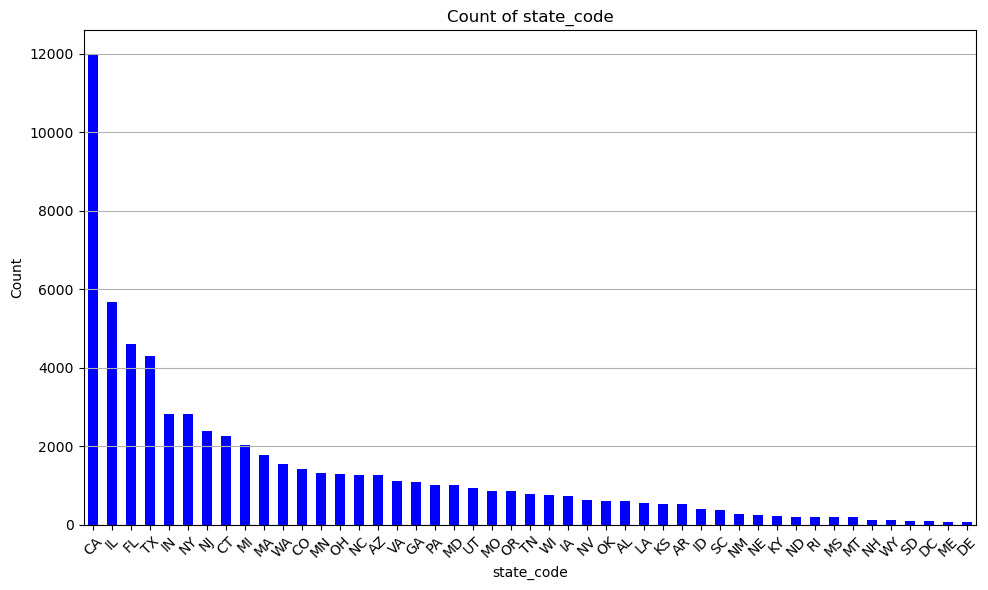

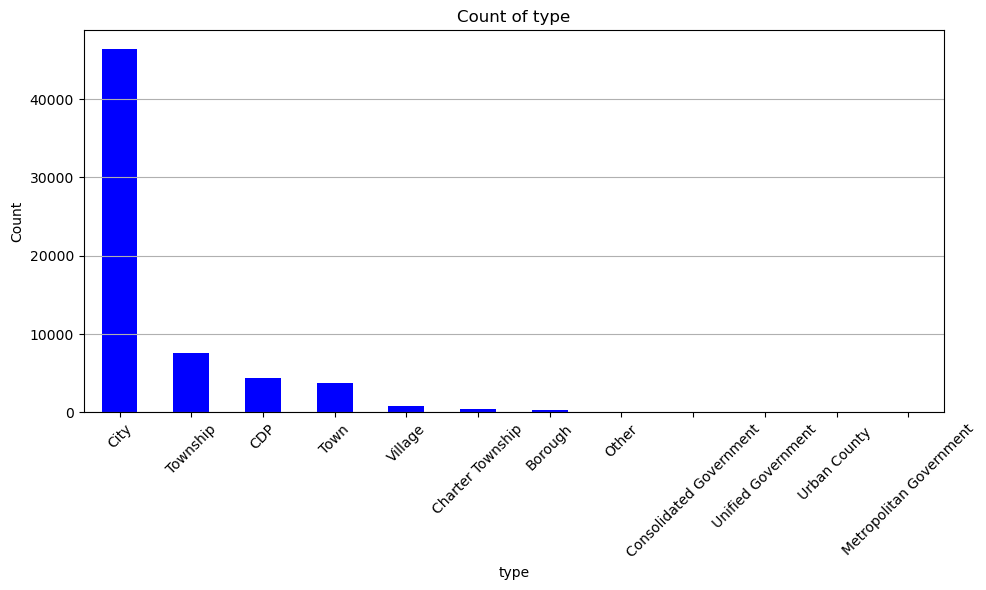

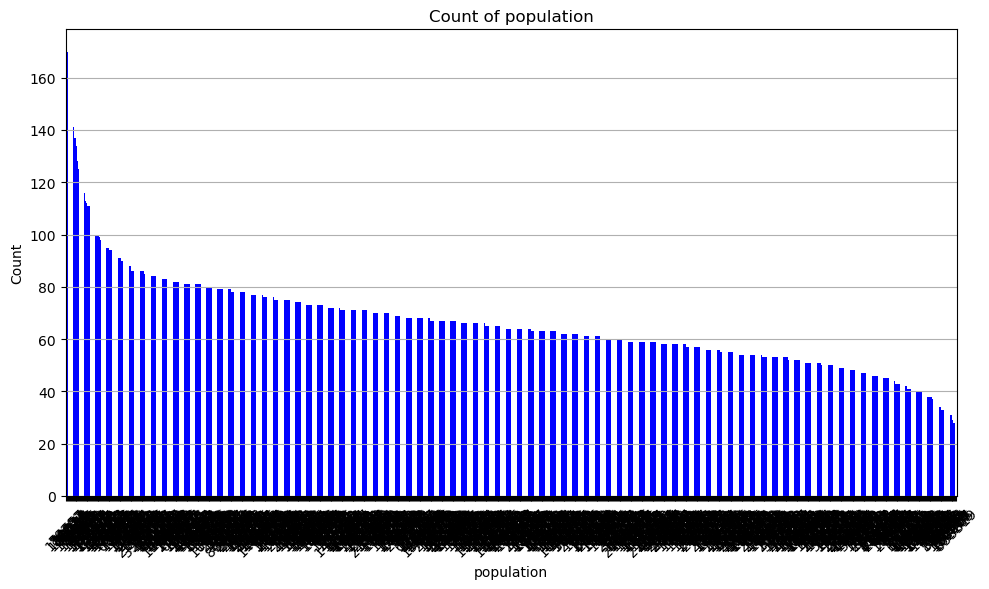

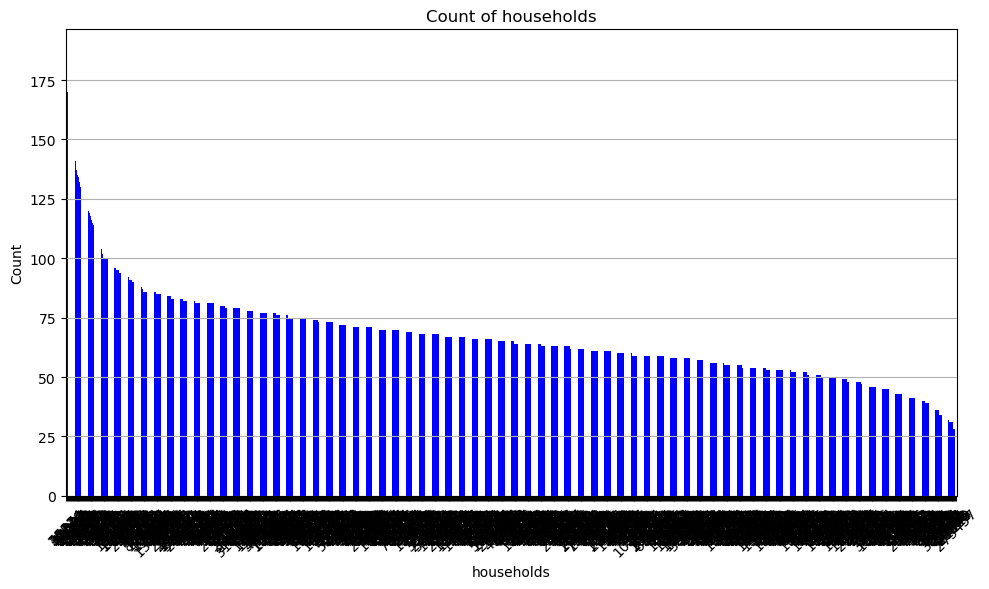

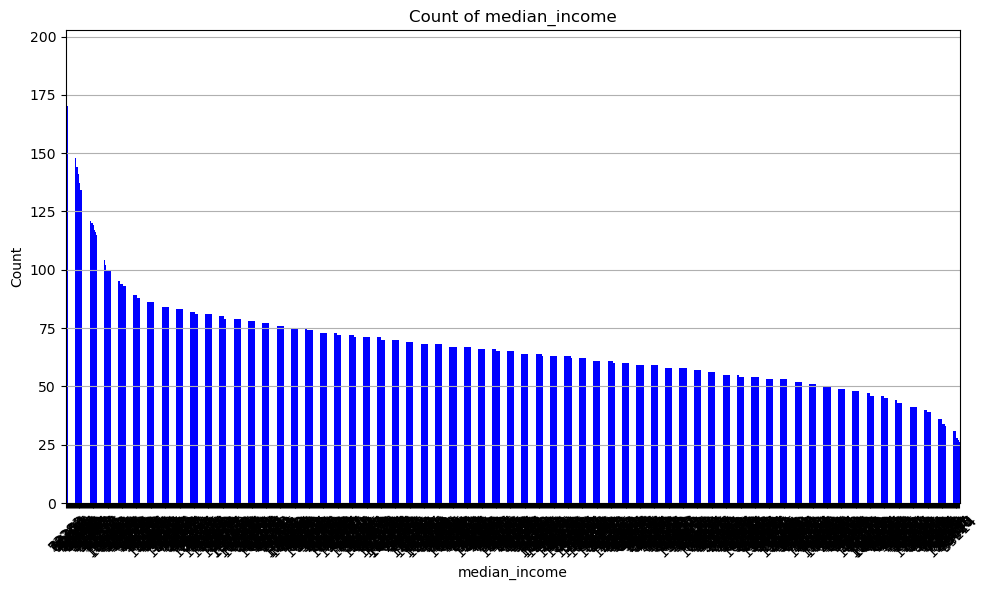

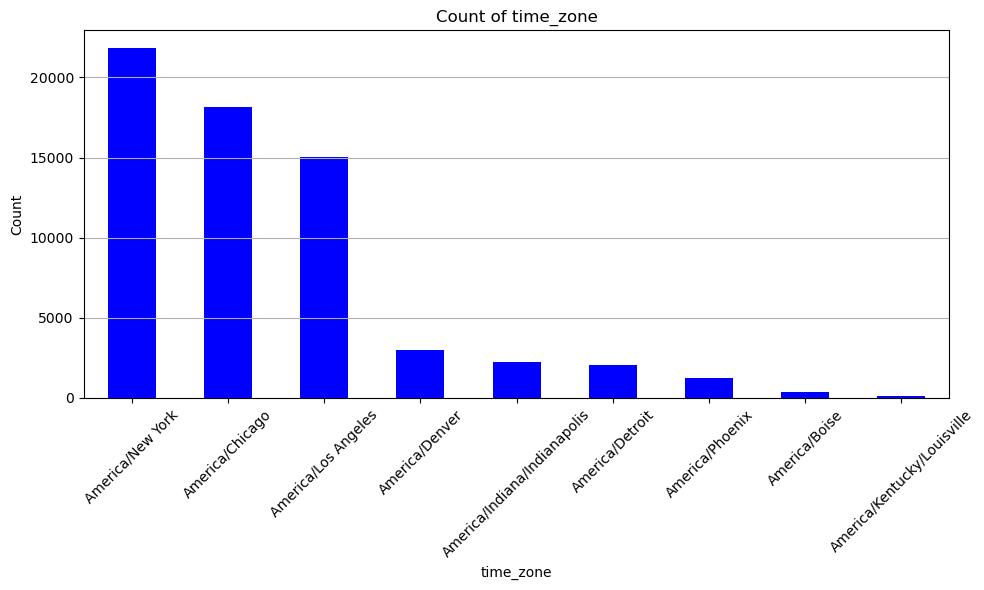

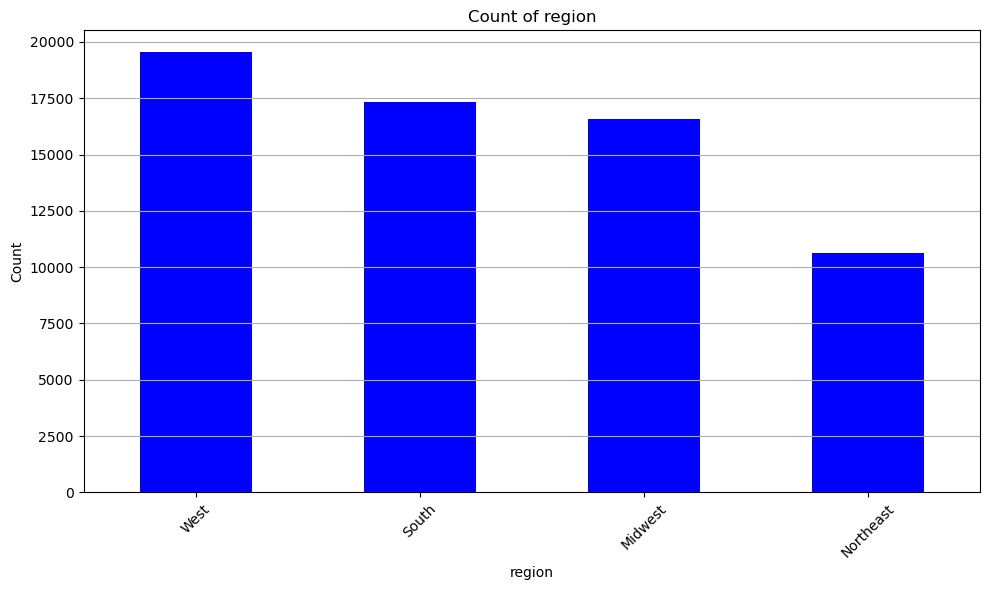

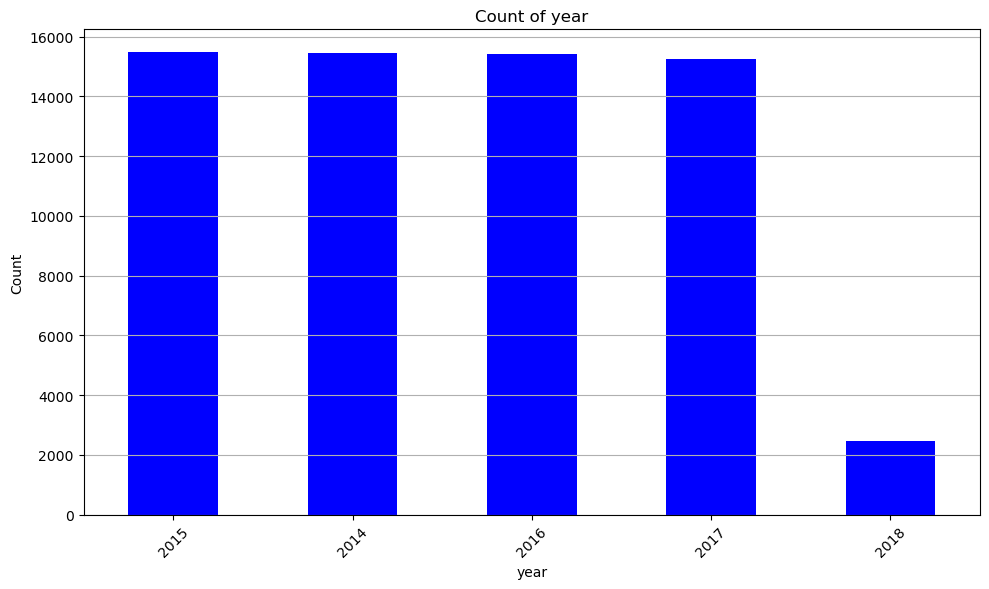

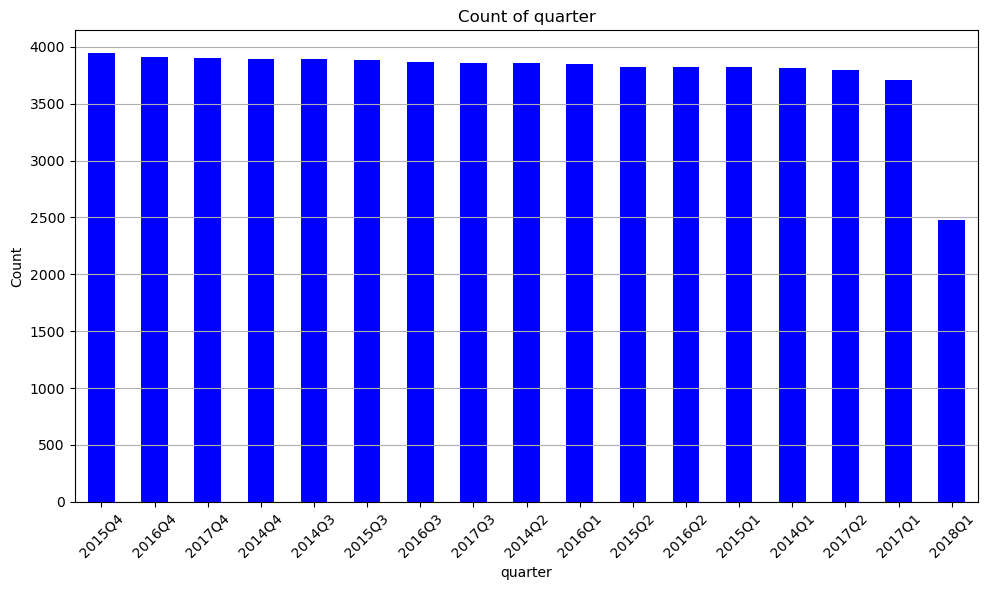

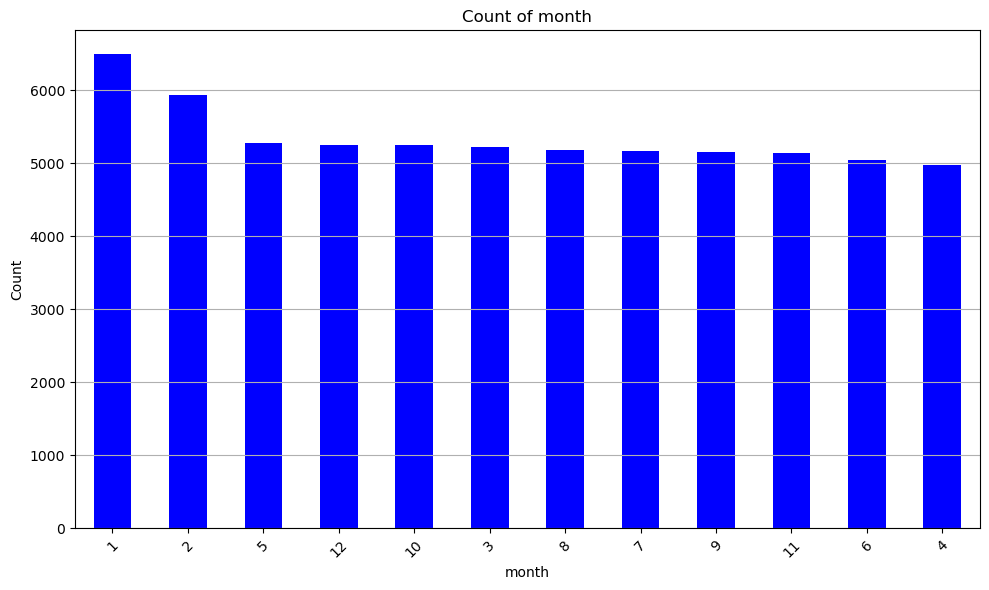

In [33]:
# Specify the columns you want to drop
columns_to_drop = ['order number', 'order date', 'unit price','state', 'longitude', 'latitude', 'budget']  # Add any columns you want to drop

# Create a list of columns to plot by dropping specified columns
columns_to_plot = df.drop(columns=columns_to_drop).columns.tolist()

# Iterate through specified columns and plot bar charts
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

#### Adding Profit and Percentage profit columns to dataframe

In [34]:
# Ensure that the 'order_date' column is in datetime format
df['order date'] = pd.to_datetime(df['order date'])

# Extract year from order_date
df['year'] = df['order date'].dt.year

# Calculate total cost (order_quantity × total_unit_cost_per_unit)
df["total cost"] = (
    df["order quantity"] * df["total unit cost"]
)

# Calculate profit
df["profit"] = df["revenue"] - df["total cost"]

# Calculate profit margin %
df["percentage_profit"] = (
    df["profit"] / df["revenue"]
) * 100

# Preview the results
df[[
    "order number", 
    "order quantity", 
    "unit price", 
    "revenue", 
    "unit price", 
    "total cost", 
    "profit", 
    "percentage_profit"
]].head()

,order number,order quantity,unit price,revenue,unit price,total cost,profit,percentage_profit
0,SO - 000225,6,2499.1,14994.6,2499.1,10946.058,4048.542,27.0
1,SO - 0006606,8,1715.2,13721.6,1715.2,6586.368,7135.232,52.0
2,SO - 0010382,12,214.4,2572.8,214.4,1440.768,1132.032,44.0
3,SO - 0001570,8,3912.8,31302.4,3912.8,15651.200,15651.200,50.0
4,SO - 0005741,9,4013.3,36119.7,4013.3,19865.835,16253.865,45.0


In [35]:
#Checking dataframe year. month and quarter format
df.head()

,order number,order date,sales channel,delivery region index,product description index,order quantity,unit price,revenue,total unit cost,customer index,...,time_zone,state,region,budget,year,quarter,month,total cost,profit,percentage_profit
0,SO - 000225,2014-01-01,Wholesale,364,27,6,2499.1,14994.6,1824.343,126,...,America/New York,Georgia,South,964940.231,2014,2014Q1,1,10946.058,4048.542,27.0
1,SO - 0006606,2016-09-22,Wholesale,364,27,8,1715.2,13721.6,823.296,82,...,America/New York,Georgia,South,964940.231,2016,2016Q3,9,6586.368,7135.232,52.0
2,SO - 0010382,2017-07-07,Distributor,364,27,12,214.4,2572.8,120.064,169,...,America/New York,Georgia,South,964940.231,2017,2017Q3,7,1440.768,1132.032,44.0
3,SO - 0001570,2014-03-27,Distributor,352,27,8,3912.8,31302.4,1956.400,53,...,America/New York,Georgia,South,964940.231,2014,2014Q1,3,15651.200,15651.200,50.0
4,SO - 0005741,2014-10-19,Wholesale,352,27,9,4013.3,36119.7,2207.315,162,...,America/New York,Georgia,South,964940.231,2014,2014Q4,10,19865.835,16253.865,45.0


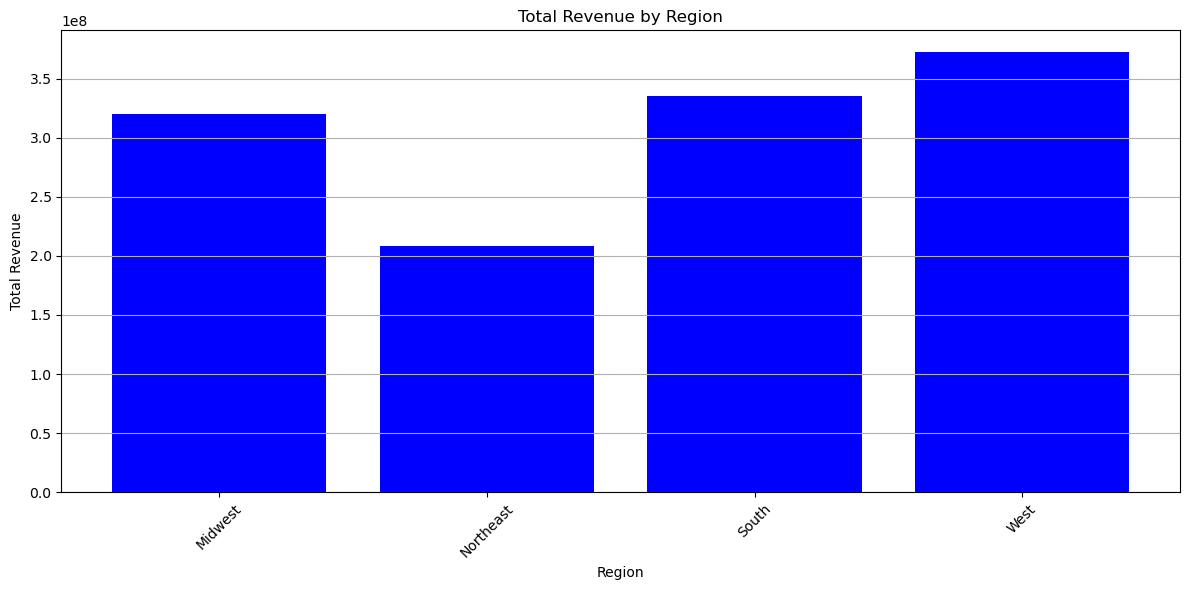

In [36]:
# Group by region and calculate total revenue
total_revenue_by_region = df.groupby('region')['revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(total_revenue_by_region['region'], total_revenue_by_region['revenue'], color='blue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

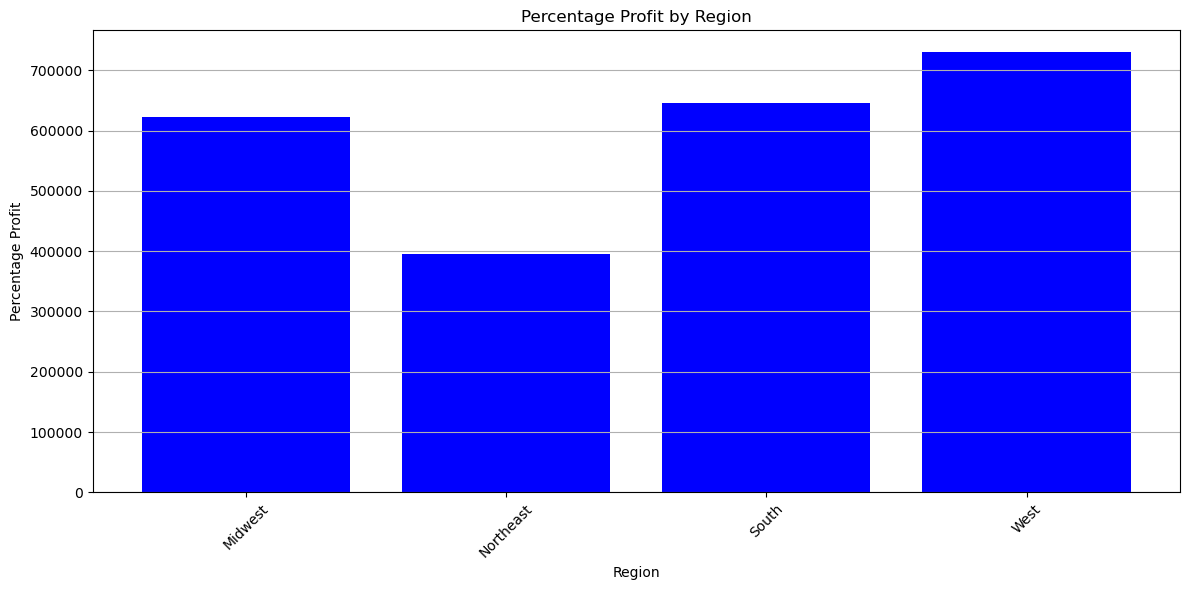

In [37]:
# Group by region and calculate total percentage profit
total_revenue_by_region = df.groupby('region')['percentage_profit'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(total_revenue_by_region['region'], total_revenue_by_region['percentage_profit'], color='blue')
plt.title('Percentage Profit by Region')
plt.xlabel('Region')
plt.ylabel('Percentage Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

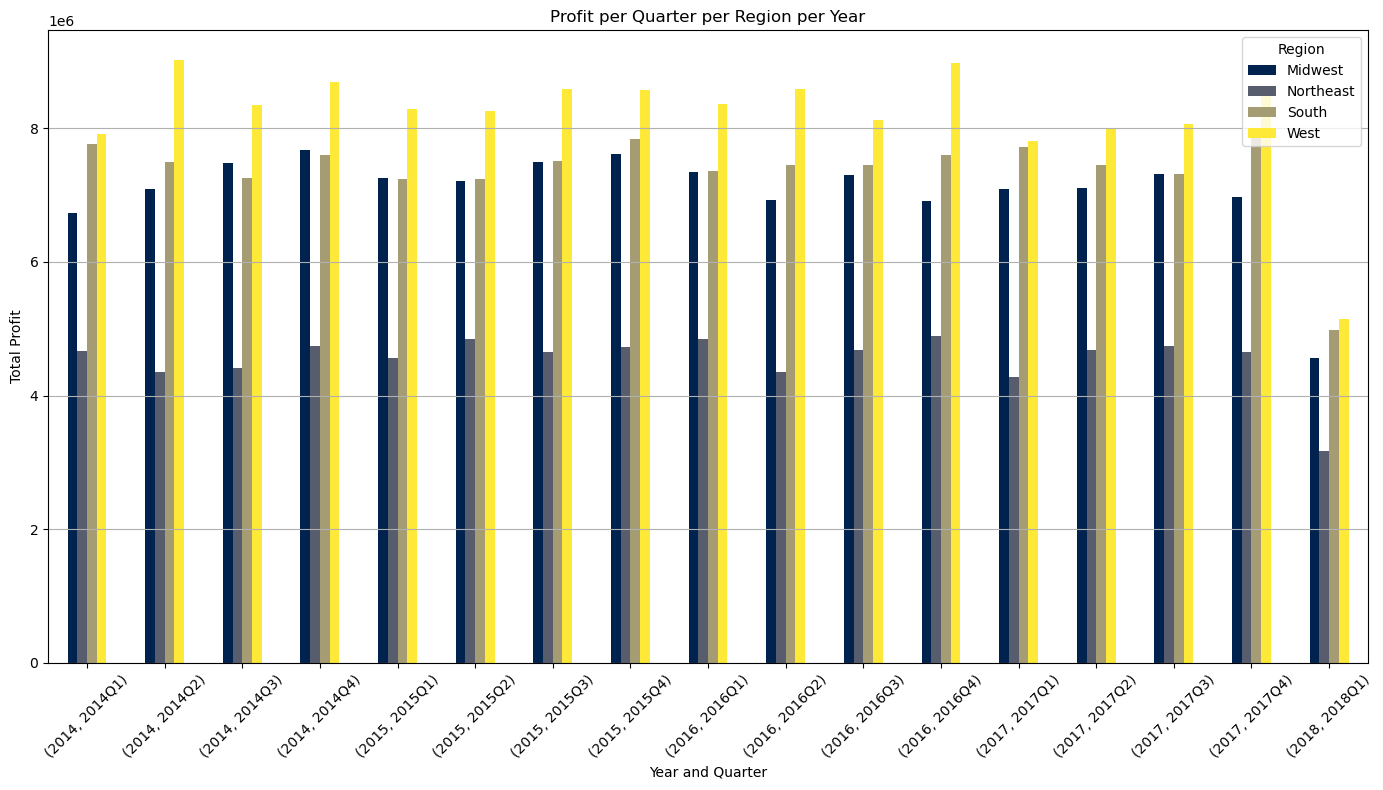

In [38]:
# Group by year, quarter, and region to calculate total profit
profit_by_quarter_region = df.groupby(['year', 'quarter', 'region'])['profit'].sum().reset_index()

# Pivot the data for plotting
pivot_table = profit_by_quarter_region.pivot_table(index=['year', 'quarter'], columns='region', values='profit', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', figsize=(14, 8), colormap='cividis')
plt.title('Profit per Quarter per Region per Year')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

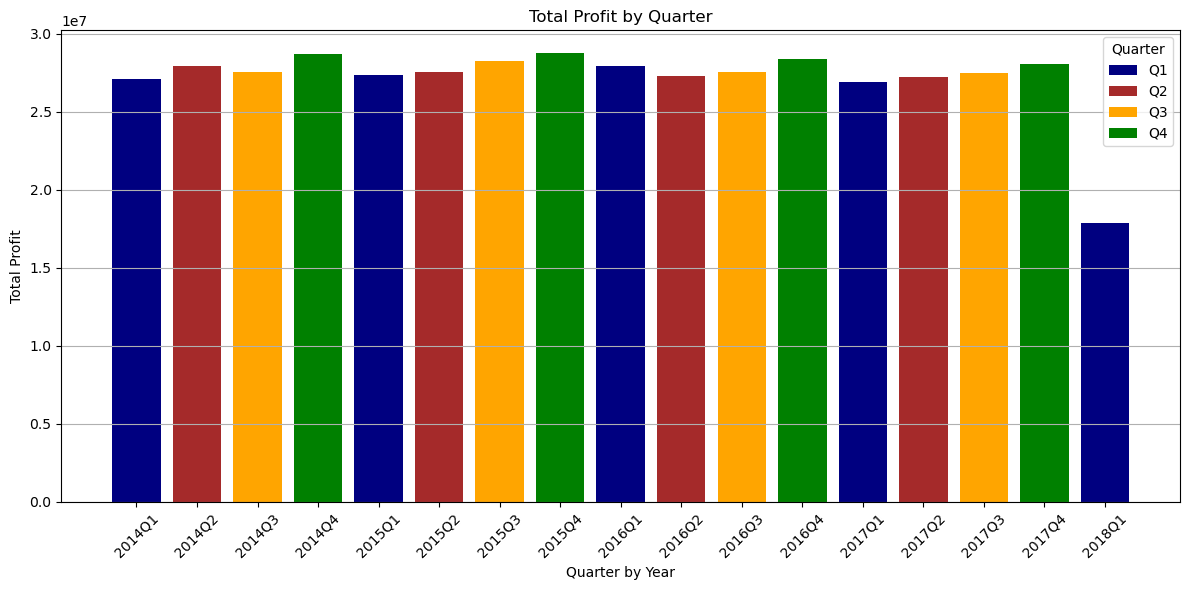

In [39]:
# Group by quarter and calculate total profit
total_profit_by_quarter = df.groupby('quarter')['profit'].sum().reset_index()

# Define a color palette for each quarter
colors = ['navy', 'brown', 'orange', 'green']  # Customize colors for Q1, Q2, Q3, Q4

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(total_profit_by_quarter['quarter'], total_profit_by_quarter['profit'], color=colors)

# Adding labels and title
plt.title('Total Profit by Quarter')
plt.xlabel('Quarter by Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

# Create a legend with unique entries for each quarter
for i, color in enumerate(colors):
    plt.bar(0, 0, color=color, label=f'Q{i + 1}')  # Dummy bar for legend
    
plt.legend(title='Quarter')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

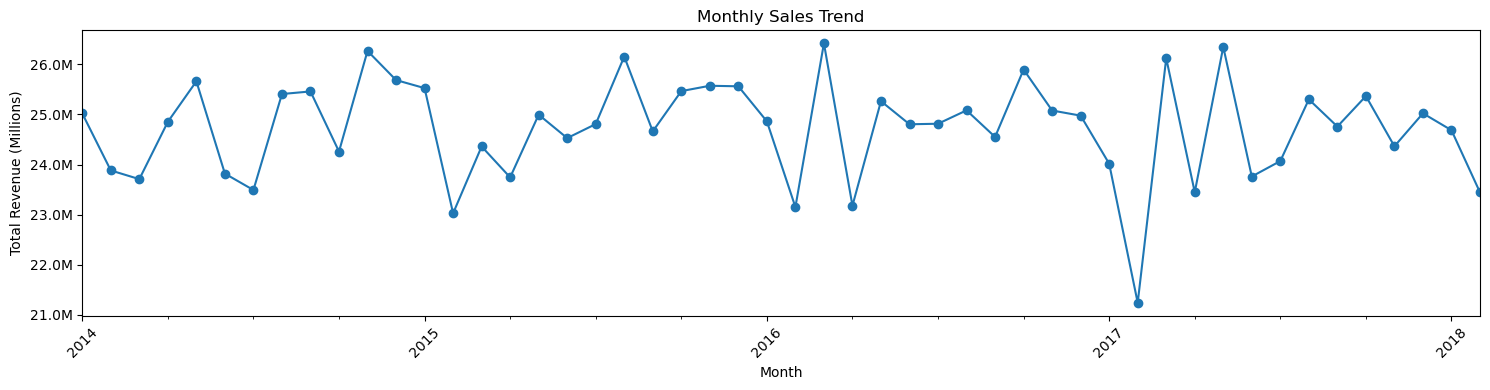

In [40]:
# 2) Monthly aggregation (stable, no resample warning)
monthly_sales = (
    df.assign(order_month=df["order date"].dt.to_period("M"))
            .groupby("order_month")["revenue"]
            .sum()
            .sort_index()
)

# Optional: ensure a continuous monthly index (fill missing months with 0)
monthly_sales = (
    monthly_sales
      .asfreq("M")                        # make it a PeriodIndex with monthly freq
      .fillna(0)
)

# 3) Convert PeriodIndex → Timestamp for clean plotting (month start)
monthly_sales.index = monthly_sales.index.to_timestamp()

# 4) Plot (Matplotlib)
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker="o")            # dots on each month

# Format Y axis in millions
formatter = FuncFormatter(lambda x, pos: f"{x/1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

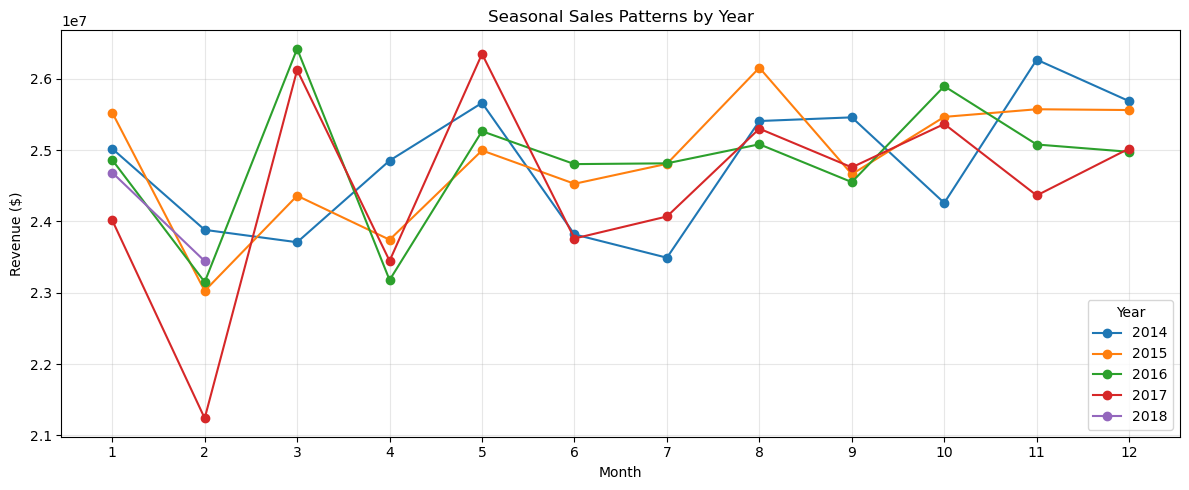

In [41]:
# extract year-month for grouping
# df["year"] = df["order_date"].dt.year
# df["month"] = df["order_date"].dt.month

seasonal_sales = (df.groupby(["year","month"])["revenue"].sum()
                  .reset_index())

plt.figure(figsize=(12,5))
for yr, data in seasonal_sales.groupby("year"):
    plt.plot(data["month"], data["revenue"], marker="o", label=str(yr))

plt.title("Seasonal Sales Patterns by Year")
plt.xlabel("Month"); plt.ylabel("Revenue ($)")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

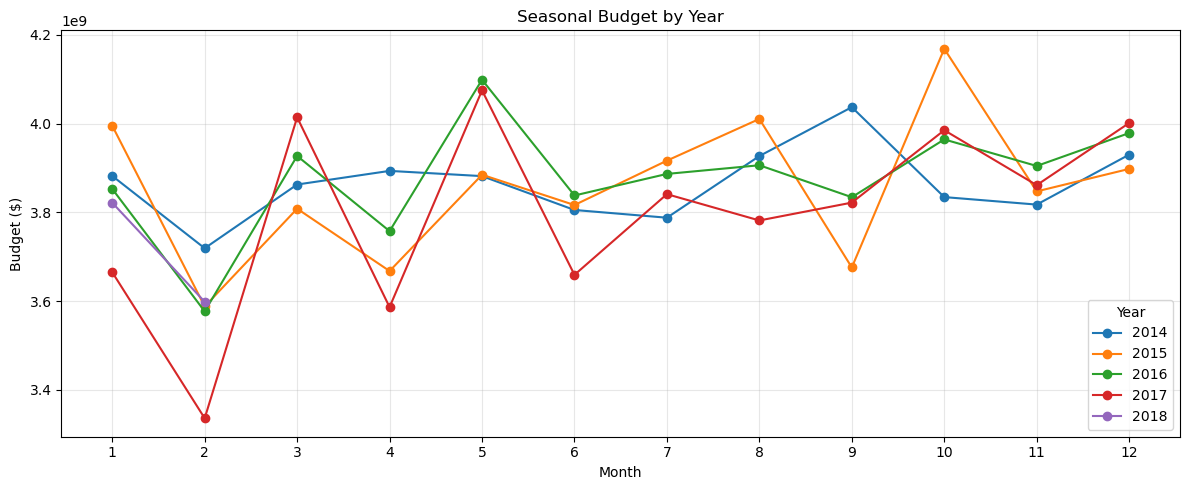

In [42]:
# extract year-month for grouping
# df["year"] = df["order_date"].dt.year
# df["month"] = df["order_date"].dt.month

seasonal_sales = (df.groupby(["year","month"])["budget"].sum()
                  .reset_index())

plt.figure(figsize=(12,5))
for yr, data in seasonal_sales.groupby("year"):
    plt.plot(data["month"], data["budget"], marker="o", label=str(yr))

plt.title("Seasonal Budget by Year")
plt.xlabel("Month"); plt.ylabel("Budget ($)")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

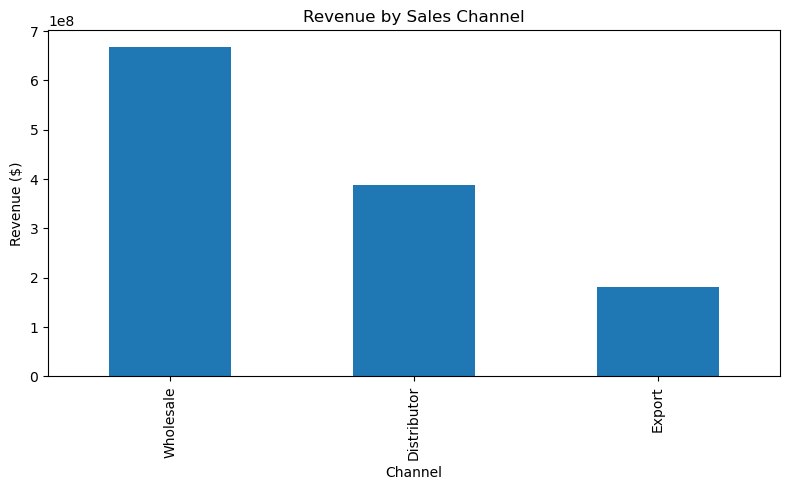

In [43]:
rev_by_channel = (df.groupby("sales channel")["revenue"].sum()
                  .sort_values(ascending=False))

plt.figure(figsize=(8,5))
rev_by_channel.plot(kind="bar")
plt.title("Revenue by Sales Channel")
plt.xlabel("Channel"); plt.ylabel("Revenue ($)")
plt.tight_layout(); plt.show()

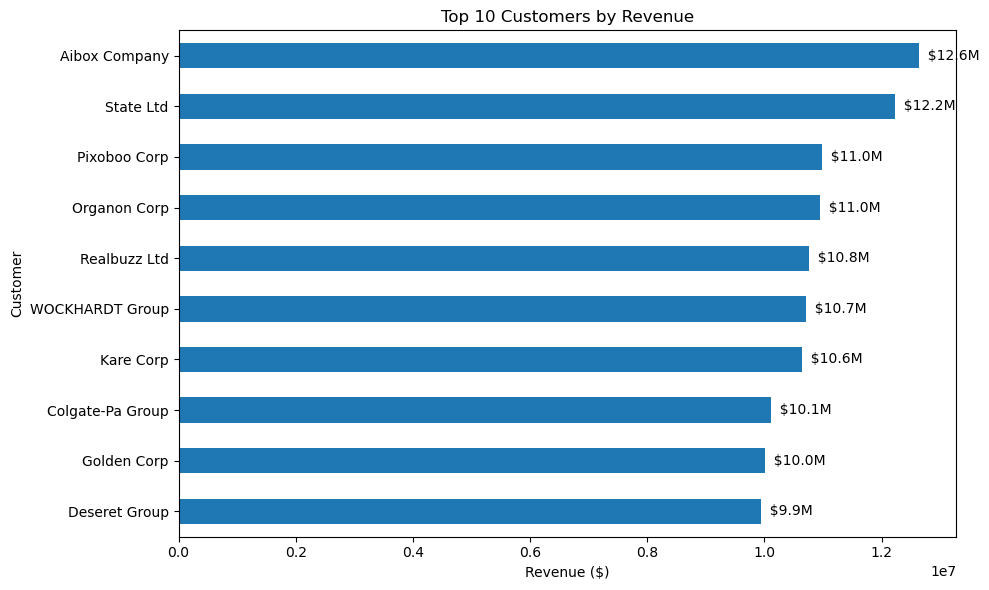

In [44]:
# Top 10 Customers by Revenue (horizontal bar chart with labels)

top_cust = (df.groupby("customer names")["revenue"].sum()
            .sort_values(ascending=False).head(10)).sort_values()  # sort for nice hbar

plt.figure(figsize=(10,6))
ax = top_cust.plot(kind="barh")
for i, v in enumerate(top_cust.values):
    ax.text(v, i, f"  ${v/1e6:.1f}M", va="center")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue ($)"); plt.ylabel("Customer")
plt.tight_layout(); plt.show()

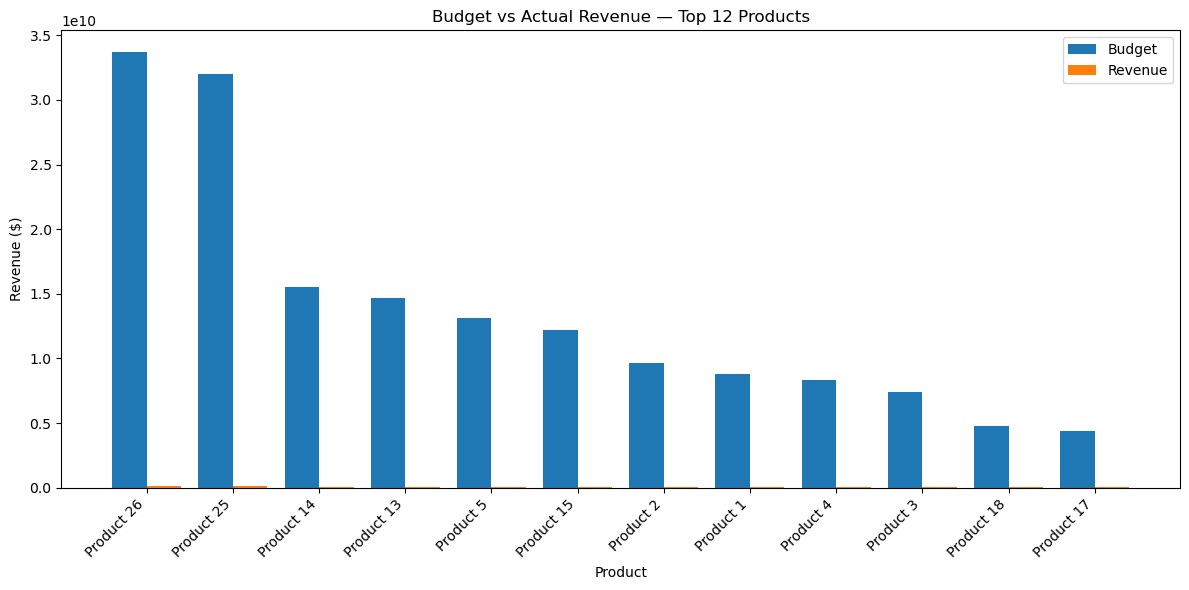

In [45]:
bvA = (df.groupby("product name")
       .agg(actual=("revenue","sum"),
            budget=("budget","sum"))
       .sort_values("budget", ascending=False)
       .head(12))

x = range(len(bvA))
width = 0.4

plt.figure(figsize=(12,6))
plt.bar([i - width/2 for i in x], bvA["budget"].values, width=width, label="Budget")
plt.bar([i + width/2 for i in x], bvA["actual"].values, width=width, label="Revenue")
plt.xticks(x, bvA.index, rotation=45, ha="right")
plt.title("Budget vs Actual Revenue — Top 12 Products")
plt.ylabel("Revenue ($)"); plt.xlabel("Product")
plt.legend()
plt.tight_layout(); plt.show()

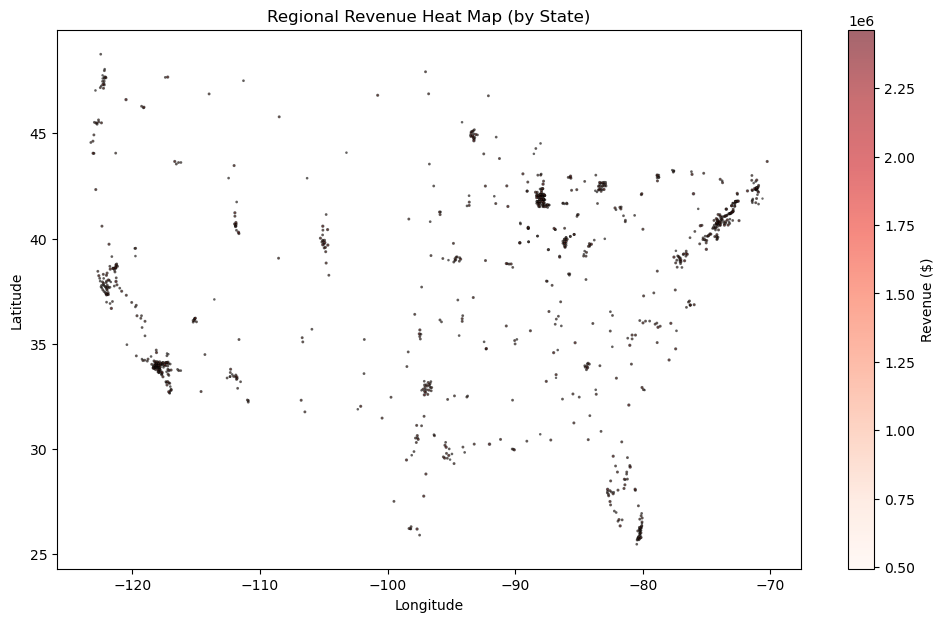

In [46]:
# aggregate revenue by state (or region, depending on granularity you want)
state_rev = df.groupby("state_code")["revenue"].sum().reset_index()

# merge back lat/lon info (assuming your merge_df has it already)
heat_df = df.groupby(["state_code", "latitude", "longitude"])["revenue"].sum().reset_index()

plt.figure(figsize=(12,7))
scatter = plt.scatter(
    heat_df["longitude"], heat_df["latitude"],
    c=heat_df["revenue"], cmap="Reds", s=heat_df["revenue"] / 1e6, alpha=0.6, edgecolor="k"
)
plt.colorbar(scatter, label="Revenue ($)")
plt.title("Regional Revenue Heat Map (by State)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

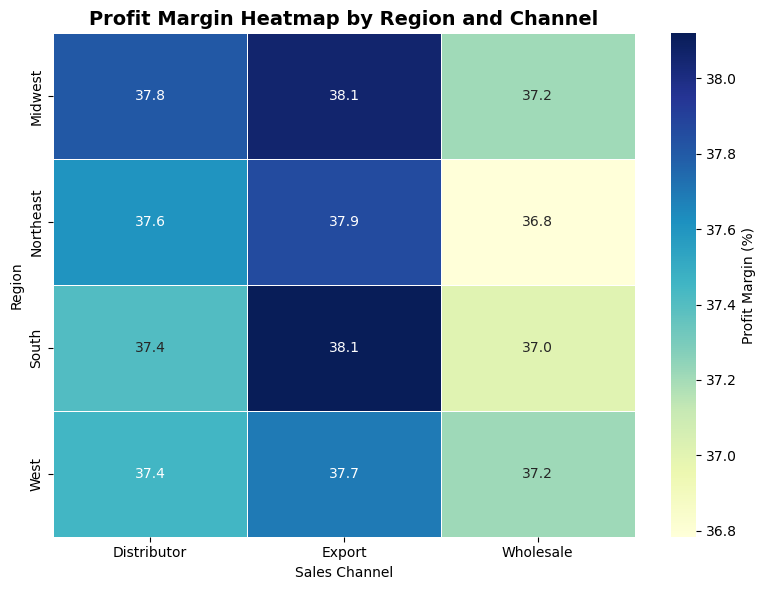

In [47]:
# Pivot the data: rows = region, columns = sales_channel, values = avg profit margin
heatmap_data = (df
    .groupby(["region", "sales channel"])["percentage_profit"]
    .mean()
    .reset_index()
    .pivot(index="region", columns="sales channel", values="percentage_profit")
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="YlGnBu", 
    linewidths=.5, cbar_kws={"label": "Profit Margin (%)"}
)

plt.title("Profit Margin Heatmap by Region and Channel", fontsize=14, weight="bold")
plt.ylabel("Region")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()

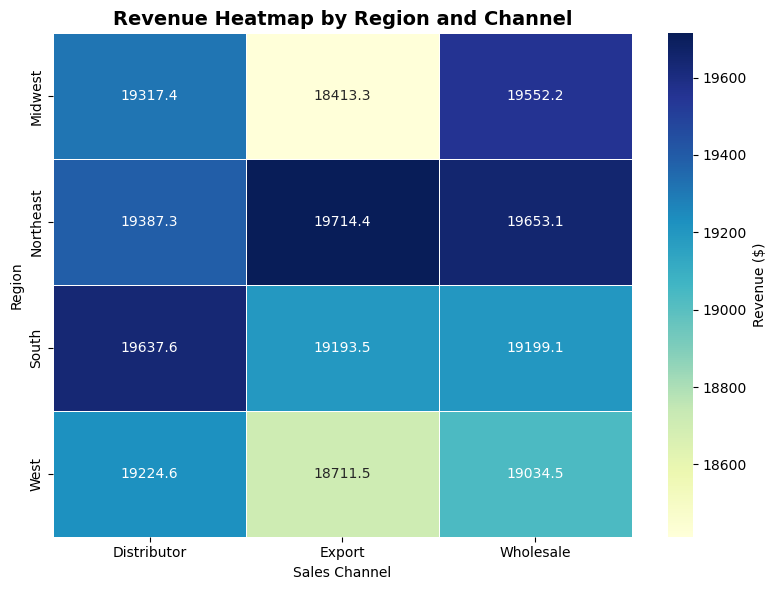

In [48]:
# Pivot the data: rows = region, columns = sales_channel, values = avg profit margin
heatmap_data = (df
    .groupby(["region", "sales channel"])["revenue"]
    .mean()
    .reset_index()
    .pivot(index="region", columns="sales channel", values="revenue")
)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data, 
    annot=True, fmt=".1f", cmap="YlGnBu", 
    linewidths=.5, cbar_kws={"label": "Revenue ($)"}
)

plt.title("Revenue Heatmap by Region and Channel", fontsize=14, weight="bold")
plt.ylabel("Region")
plt.xlabel("Sales Channel")
plt.tight_layout()
plt.show()